<h2> Group Members: </h2>
Mayur Arvind - 2016B1A70603G <br>
Agrim Agarwal - 2017A7PS0927G <br>
Annavaram Nishanth - 2017A7PS0042G <br>
Tarkeshwara B S Kandregula - 2017A7PS0931G <br>

<h2> Parsing queries and documents </h2>

In [1]:
!pip3 install nltk
import matplotlib.pyplot as plt
import numpy as np

You should consider upgrading via the '/usr/local/opt/python@3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
with open("dataset/13/query.txt") as f:
    queries = f.readlines()

In [3]:
parsed_queries = []
for query in queries:
    if query[0] != '/' and query[0] != '\n' and not (query[0]>='0' and query[0]<='9'):
        parsed_queries.append(query[:-1].lower())

In [4]:
with open("dataset/13/relevance_assessment.txt") as f:
    relevant_docs = f.readlines()

In [5]:
parsed_relevant_docs = []
for relevant_list in relevant_docs:
    if relevant_list[0] != '/' and relevant_list[0] != '\n' and len(relevant_list) > 3:
        parsed_relevant_docs.append(list(map(int, relevant_list[:-1].split())))

In [6]:
#set of all document ids used to prepare the index
docs_for_index = set()
for relevant_list in parsed_relevant_docs:
    docs_for_index = docs_for_index.union(set(relevant_list))

In [7]:
with open("dataset/documents.txt") as f:
    documents = f.readlines()

In [8]:
doc_indices = {}
for doc in docs_for_index:
    doc_indices[doc] = documents.index(str(doc)+'\n')

In [9]:
#dictionary of document id -> text
document_dict = {}
for doc in sorted(doc_indices):
    i = doc_indices[doc]+1
    s = ""
    while not ("/\n" in documents[i]):
        s += (documents[i][:-1] + " ")
        i += 1
    document_dict[doc] = s

In [10]:
docs_for_index_construction = []
for doc in document_dict:
    docs_for_index_construction.append(document_dict[doc])

<h2> Task 1 </h2>

In [11]:
#Standard Inverted Index class
class invertedIndex(object):
    def __init__(self,docs):
        self.docs = docs
        self.termList = []
        self.docLists = []

        for index,doc in enumerate(docs):
            for term in doc.split():
                if term in self.termList:
                    i=self.termList.index(term)
                    if index not in self.docLists[i]:
                        self.docLists[i].append(index)
                else:
                    self.termList.append(term)
                    self.docLists.append([index])
    def search(self,term):
        try:
            i=self.termList.index(term)
            return self.docLists[i]
        except:
            return "No results"

In [12]:
#create index for all the documents
inv_ind = invertedIndex(docs_for_index_construction)
print(f"Size of vocabulary of Ifull  {len(inv_ind.termList)}")

Size of vocabulary of Ifull  1517


In [13]:
#calculate frequencies of each term in the dictionary
frequencies = []
for term in inv_ind.termList:
    frequencies.append([term, len(inv_ind.search(term))])
frequencies.sort(key=lambda x:x[1], reverse=True)

The words in the dictionary and the corresponding frequencies are displayed below.

In [14]:
frequencies

[['the', 126],
 ['of', 125],
 ['and', 95],
 ['in', 81],
 ['a', 80],
 ['is', 74],
 ['at', 68],
 ['to', 65],
 ['are', 64],
 ['from', 55],
 ['with', 51],
 ['for', 50],
 ['by', 47],
 ['radio', 43],
 ['on', 43],
 ['an', 39],
 ['that', 35],
 ['ionosphere', 31],
 ['observations', 31],
 ['results', 28],
 ['measurements', 27],
 ['made', 27],
 ['be', 26],
 ['ionospheric', 25],
 ['region', 24],
 ['between', 23],
 ['frequency', 22],
 ['f', 22],
 ['which', 20],
 ['surface', 19],
 ['moon', 19],
 ['scattering', 19],
 ['during', 18],
 ['layer', 18],
 ['obtained', 17],
 ['some', 17],
 ['waves', 17],
 ['field', 17],
 ['drift', 17],
 ['also', 17],
 ['effect', 16],
 ['magnetic', 16],
 ['theory', 16],
 ['were', 15],
 ['diurnal', 15],
 ['near', 15],
 ['show', 15],
 ['radar', 15],
 ['method', 14],
 ['e', 14],
 ['electron', 14],
 ['lunar', 13],
 ['as', 13],
 ['height', 13],
 ['drifts', 13],
 ['variation', 13],
 ['described', 13],
 ['but', 13],
 ['than', 13],
 ['about', 13],
 ['radiation', 13],
 ['discussed', 

There are a few terms with a very high frequency compared to the other terms. These are stopwords. Checking the frequencies, it can be seen that these are not standard English stopwords. The dataset consists of documents related to astronomy, and many astronomical terms are stopwords. A stopword set consisting of the 50 most frequently seen terms is given below.

In [15]:
stopwords = [freq[0] for freq in frequencies[:50]]
print("Stopwords: ", stopwords)

Stopwords:  ['the', 'of', 'and', 'in', 'a', 'is', 'at', 'to', 'are', 'from', 'with', 'for', 'by', 'radio', 'on', 'an', 'that', 'ionosphere', 'observations', 'results', 'measurements', 'made', 'be', 'ionospheric', 'region', 'between', 'frequency', 'f', 'which', 'surface', 'moon', 'scattering', 'during', 'layer', 'obtained', 'some', 'waves', 'field', 'drift', 'also', 'effect', 'magnetic', 'theory', 'were', 'diurnal', 'near', 'show', 'radar', 'method', 'e']


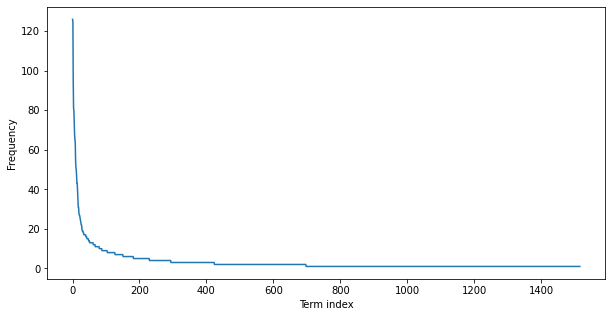

In [16]:
#plot frequences of all words
plt.figure(figsize=(10, 5))
plt.plot([freq[1] for freq in frequencies])
plt.xlabel("Term index")
plt.ylabel("Frequency")
plt.show()

Some of the most frequent stopwords are shown below.

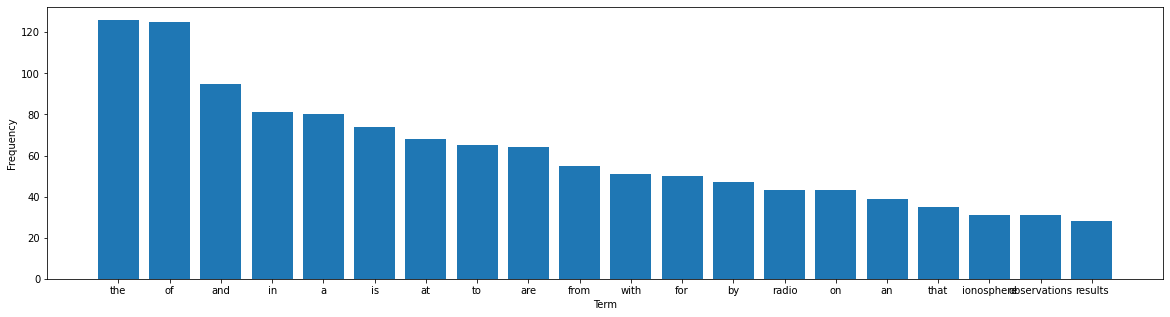

In [17]:
#frequencies of 20 most common words
plt.figure(figsize=(20, 5))
plt.bar([freq[0] for freq in frequencies[:20]], [freq[1] for freq in frequencies[:20]])
plt.xlabel("Term")
plt.ylabel("Frequency")
plt.show()

In [18]:
#mapping for easy result evaluation
mp = sorted(list(docs_for_index))

In [19]:
#results of a set of queries against an index
def results(queries, index):
    query_results = [[] for _ in range(len(queries))]
    for i, query in enumerate(queries):
        for term in query.split():
            res = index.search(term)
            if res != "No results":
                query_results[i].extend(res)
        query_results[i] = sorted(list(set(query_results[i])))
    return query_results

In [20]:
#calculate precision, recall and plot them
def evaluate(query_results, relevant_docs, mapping):
    precision = []
    recall = []
    for i in range(len(query_results)):
        precision.append(len(set([mapping[i] for i in query_results[i]]).intersection(set(relevant_docs[i]))) / len(query_results[i]))
        recall.append(len(set([mapping[i] for i in query_results[i]]).intersection(set(relevant_docs[i]))) / len(relevant_docs[i]))
    plt.plot(range(1, 1+len(query_results)), precision, label="Precision")
    plt.plot(range(1, 1+len(query_results)), recall, label="Recall")
    plt.legend()
    plt.xlabel("Query ID")
    plt.ylabel("Score")
    plt.show()
    return precision, recall

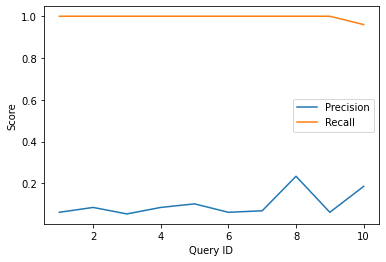

Average precision of Ifull over 10 queries = 0.10028671987613802
Average recall of Ifull over 10 queries = 0.9960000000000001


In [21]:
Ifull_results = results(parsed_queries, inv_ind)
Ifull_eval = evaluate(Ifull_results, parsed_relevant_docs, mp)
print(f"Average precision of Ifull over 10 queries = {sum(Ifull_eval[0])/10}")
print(f"Average recall of Ifull over 10 queries = {sum(Ifull_eval[1])/10}")

<h2> Task 2 </h2>

<h4> Ip </h4>

For increasing precision, we performed stopword removal.

In [22]:
def filter_stopwords(docs, stopwords):
    filtered_docs = []
    for doc in docs:
        s = ""
        for word in doc.split():
            if word not in stopwords:
                s += (word + " ")
        filtered_docs.append(s)
    return filtered_docs

We experimented with different sizes of stopword lists - we selected the l most frequently appearing words for different values of l.

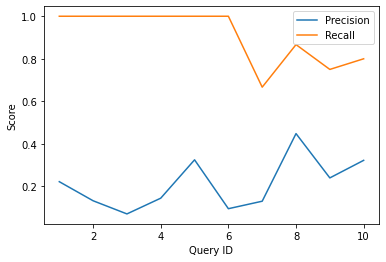

Average precision and recall for stopword list of size 10: 0.21317256405935306, 0.9083333333333334


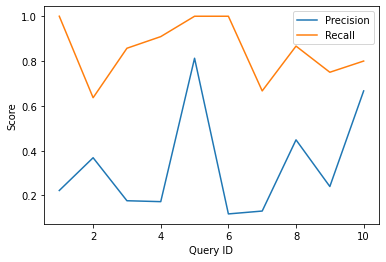

Average precision and recall for stopword list of size 20: 0.3355052026360401, 0.8485930735930737


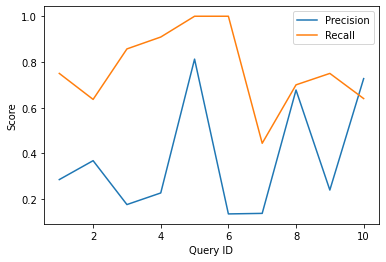

Average precision and recall for stopword list of size 30: 0.3788594990787065, 0.7687041847041847


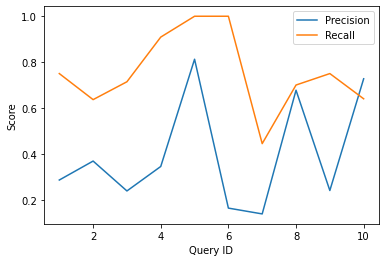

Average precision and recall for stopword list of size 40: 0.3995446585364644, 0.7544184704184704


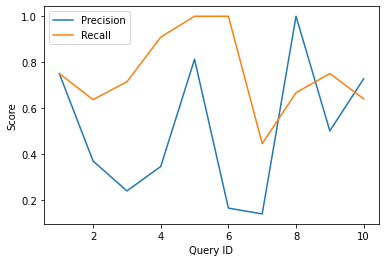

Average precision and recall for stopword list of size 50: 0.5042312944811649, 0.7510851370851371


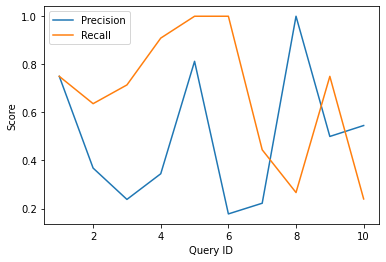

Average precision and recall for stopword list of size 60: 0.4959298422388258, 0.6710851370851372


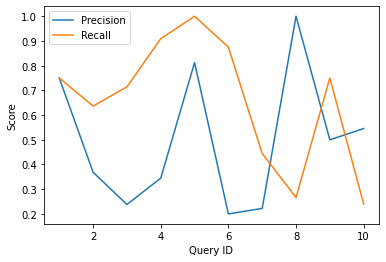

Average precision and recall for stopword list of size 70: 0.4981520644610482, 0.6585851370851372


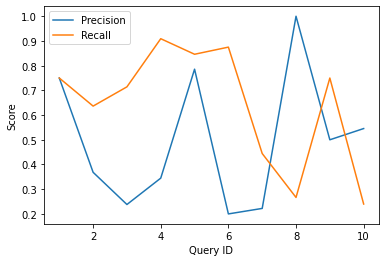

Average precision and recall for stopword list of size 80: 0.4954734930324767, 0.6432005217005218


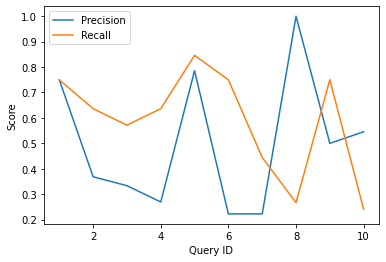

Average precision and recall for stopword list of size 90: 0.4996598430808957, 0.5891420801420801


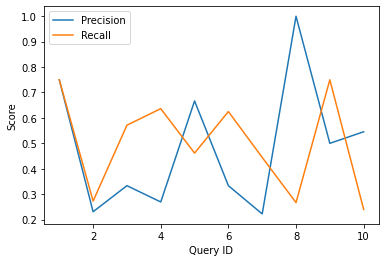

Average precision and recall for stopword list of size 100: 0.48510101010101003, 0.5018169053169054


In [23]:
for len_stopwords in range(10, 110, 10):
    stopword_list = [freq[0] for freq in frequencies[:len_stopwords]]
    docs_without_stopwords = filter_stopwords(docs_for_index_construction, stopword_list)
    inv_ind_without_stopwords = invertedIndex(docs_without_stopwords)
    parsed_queries_without_stopwords = filter_stopwords(parsed_queries, stopword_list)
    res = results(parsed_queries_without_stopwords, inv_ind_without_stopwords)
    prec, rec = evaluate(res, parsed_relevant_docs, mp)
    print(f"Average precision and recall for stopword list of size {len_stopwords}: {sum(prec)/10}, {sum(rec)/10}")

It is observed that the highest average precision is observed for a stopword list containing the 50 most frequently occuring terms.

In [24]:
stopword_list = [freq[0] for freq in frequencies[:50]]
docs_without_stopwords = filter_stopwords(docs_for_index_construction, stopword_list)
inv_ind_without_stopwords = invertedIndex(docs_without_stopwords)
parsed_queries_without_stopwords = filter_stopwords(parsed_queries, stopword_list)
print(f"Size of vocabulary of Ip = {len(inv_ind_without_stopwords.termList)}")

Size of vocabulary of Ip = 1467


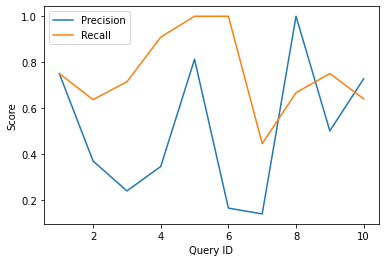

Average precision of Ip over 10 queries = 0.5042312944811649
Average recall of Ip over 10 queries = 0.7510851370851371


In [25]:
Ip_results = results(parsed_queries_without_stopwords, inv_ind_without_stopwords)
Ip_eval = evaluate(Ip_results, parsed_relevant_docs, mp)
print(f"Average precision of Ip over 10 queries = {sum(Ip_eval[0])/10}")
print(f"Average recall of Ip over 10 queries = {sum(Ip_eval[1])/10}")

<h4> Ir </h4>

For increasing recall, we performed stemming.

In [26]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [27]:
def stem(docs):
    stemmed_docs = []
    for doc in docs:
        s = ""
        for word in doc.split():
            s += (ps.stem(word) + " ")
        stemmed_docs.append(s)
    return stemmed_docs

In [28]:
stemmed_docs = stem(docs_for_index_construction)
inv_ind_stemmed = invertedIndex(stemmed_docs)
parsed_queries_stemmed = stem(parsed_queries)
print(f"Size of vocabulary of Ir = {len(inv_ind_stemmed.termList)}")

Size of vocabulary of Ir = 1187


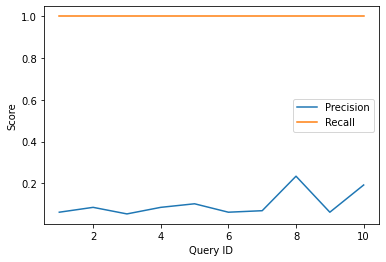

Average precision of Ir over 10 queries = 0.10087109673958465
Average recall of Ir over 10 queries = 1.0


In [29]:
Ir_results = results(parsed_queries_stemmed, inv_ind_stemmed)
Ir_eval = evaluate(Ir_results, parsed_relevant_docs, mp)
print(f"Average precision of Ir over 10 queries = {sum(Ir_eval[0])/10}")
print(f"Average recall of Ir over 10 queries = {sum(Ir_eval[1])/10}")

In [30]:
#function to display a grouped bar plot
def barplot(list1, list2, label1, label2, xlabel, ylabel):
    labels = list(range(1, 11))
    x = np.arange(len(labels)) 
    width = 0.3 
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, list1, width, label=label1)
    rects2 = ax.bar(x + width/2, list2, width, label=label2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    fig.tight_layout()
    plt.show()

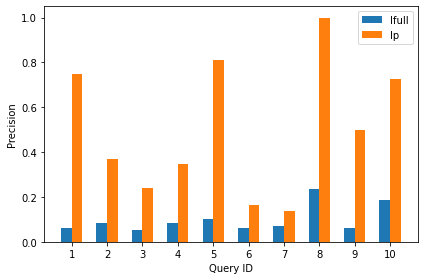

In [31]:
barplot(Ifull_eval[0], Ip_eval[0], "Ifull", "Ip", "Query ID", "Precision")

For every query, the precision is much higher in Ip than Ifull.

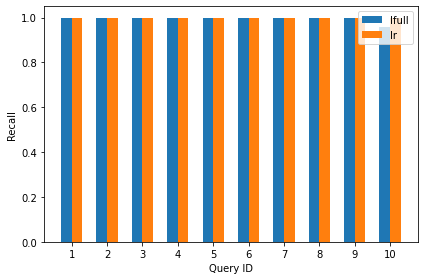

In [32]:
barplot(Ifull_eval[1], Ir_eval[1], "Ifull", "Ir", "Query ID", "Recall")

Due to the presence of stopwords in Ifull, recall is 100% for every query except the last one. Stemming increases the precision of this query too, resulting in a 100% average recall.

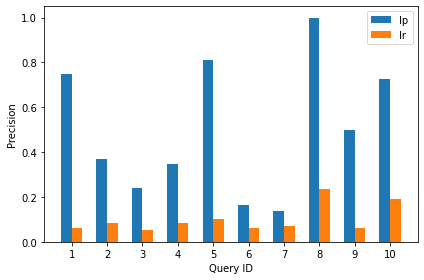

In [33]:
barplot(Ip_eval[0], Ir_eval[0], "Ip", "Ir", "Query ID", "Precision")

Precision is increased in Ip by stopword removal, stopwords cause the retrieval of irrelevant documents in Ir.

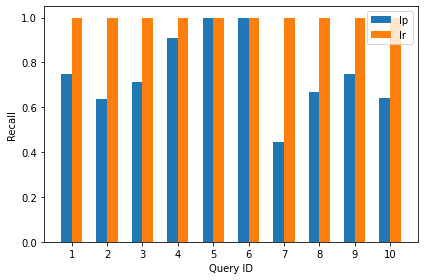

In [34]:
barplot(Ip_eval[1], Ir_eval[1], "Ip", "Ir", "Query ID", "Recall")

Ir retrieves almost every document in the index for any query, leading to high recall.

<h2> Task 3 </h2>

(a)

Ip - In this model, 50 most frequently occuring words are treated as stopwords and removed from documents and queries.

Inference - This model was able to increase the precision for all the 10 queries. At the same time, it lowered the recall as compared to Ifull.

Justification - When frequently occuring terms are removed from the documents and queries, the retrieval of a document depends on relatively uncommon terms present in the query. There are fewer documents containing these terms. As a result, fewer documents are retrieved compared to Ifull and a higher fraction is relevant to the query. This results in a high precision. 

Ir - In this model, the Porter stemming algorithm to reduce every word in the documents and query to its stem. 

Inference - The Ir model was able to increase the recall for 1 query as the recall for the other 9 queries was already 1. The precision remained the same as Ifull.

Justification - There may be multiple forms of a word in different documents, all of which may be relevant to a query, which may have yet another form of the word. Stemming deals with this problem by reducing each term to its "stem". For example, if a query contains "ion", we might also consider documents with "ionic", "ionization" and "ionized" relevant. In Ifull, these documents would not be retrieved (ignoring the presence of a stopword). In Ir, all these words are considered to have the same stem, and all documents containing them are retrieved, increasing the fraction of relevant documents (recall). Lemmatization could have been used too, but it sacrifices some potential gains in recall towards precision.

(b)

i) In the first grouped bar plot, the precision increased for every query using Ip, which is expected. The stopword removal causes fewer documents to be retrieved for a given query, increasing the precision.

ii) In the second grouped bar plot, the recall increased for last query using Ip and for all the other queries, the recall values of Ir and Ifull are the same (100%). Stemming reduces each term to its base form. When a query is fired, all documents containing terms which have the same root are retrieved too, increasing the recall.

iii) In the third grouped bar plot for comparing precision values of Ip and Ir, the results are as expected - the precision values of Ip are much higher than those of Ir for every query. This is because of the stopwords in Ir which cause retrieval of irrelevant documents.

iv)  In the fourth grouped bar plot for comparing recall values of Ip and Ir, recall values of Ir for all queries are greater than or equal to those of Ip. This is because of the presence of stopwords and stemming in Ir, which cause retrieval of almost all documents, resulting in a 100% recall.


<h2> Task 4 </h2>

In [35]:
#return all bigrams of a word
def bigrams(word):
    ans = []
    if len(word) == 0:
        return ans
    ans.append('$'+word[0])
    for i in range(len(word)-1):
        ans.append(word[i]+word[i+1])
    ans.append(word[-1]+'$')
    return ans

In [36]:
#generate bigram index from a set of documents
def bigram_index(docs):
    all_bigrams = set()
    for doc in docs:
        for word in doc.split():
            all_bigrams = all_bigrams.union(set(bigrams(word)))
    all_words = set()
    for doc in docs:
        for word in doc.split():
            all_words.add(word)
    bigram_index = {}
    for bigram in all_bigrams:
        for word in all_words:
            if (bigram in word) or (bigram[0]=='$' and word[0]==bigram[1]) or (bigram[1]=='$' and word[-1]==bigram[0]):
                if not (bigram in bigram_index):
                    bigram_index[bigram] = []
                bigram_index[bigram].append(word)
    return bigram_index

In [37]:
#expand a set of wildcard queries
def expand_wildcard(queries, bigram_index):
    res = []
    for query in queries:
        query_res = []
        for word in query.split():
            if not ('*' in word):
                query_res.append(word)
            else:
                bigrams_to_search = []
                loc = word.index('*')
                bigrams_to_search.extend(bigrams(word[:loc])[:-1])
                bigrams_to_search.extend(bigrams(word[loc+1:])[1:])
                ans = set(bigram_index[bigrams_to_search[0]])
                for i in range(1, len(bigrams_to_search)):
                    ans = ans.intersection(set(bigram_index[bigrams_to_search[i]]))
                query_res.extend(list(ans))
        s = ""
        for term in query_res:
            s += term + " "
        res.append(s)
    return res

<h4> Bigram index on Ifull </h4>

In [38]:
Ifull_bigram_index = bigram_index(docs_for_index_construction)

In [39]:
Ifull_wildcard_queries = ['the *ect of small dist*ions in the surf* of a cavity resonator',
                            'the determ* of the or*ts of individual *eors by radio methods',
                            'the *mination of ion masses in the ion*ere by the study of back scat* radio waves',
                            'theo* studies of the source of high *uency radio waves em*ed from the planet jupiter',
                            'sim*ous obs* of whistlers and *tning discharges',
                            'var* in the height of re*tion of low or very low *ency radio waves in the period before ground sunrise',
                            'the use of ion*ic cross mod* in the determination of ionospheric electron *ities and collision frequencies',
                            'meas*ents of *spheric drifts near the equa*',
                            'the use of an*gue comp* in upper *phere theory',
                            'the use of lunar radio refl* in inv*tions of the nature of the moons *face']

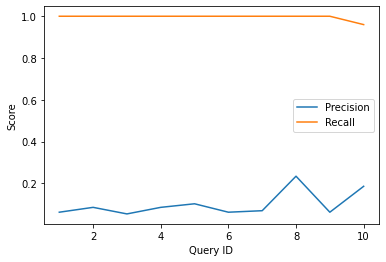

Average precision of bigram index on Ifull over 10 queries = 0.10024497867160612
Average recall of bigram index on Ifull over 10 queries = 0.9960000000000001


In [40]:
Ifull_wildcard_queries_expanded = expand_wildcard(Ifull_wildcard_queries, Ifull_bigram_index)
Ifull_wildcard_results = results(Ifull_wildcard_queries_expanded, inv_ind)
Ifull_wildcard_eval = evaluate(Ifull_wildcard_results, parsed_relevant_docs, mp)
print(f"Average precision of bigram index on Ifull over 10 queries = {sum(Ifull_wildcard_eval[0])/10}")
print(f"Average recall of bigram index on Ifull over 10 queries = {sum(Ifull_wildcard_eval[1])/10}")

The recall is the same as Ifull, except for a very slight drop in precision. This might be because of additional irrelevant documents retrieved because of the wildcards.

<h4> Bigram index on Ip </h4> 

In [41]:
Ip_bigram_index = bigram_index(docs_without_stopwords)

In [42]:
Ip_wildcard_queries = ['*all dist*ions cav* *nator',
                            'determ* or*ts individual *eors methods',
                            '*mination ion m*es study back scat*',
                            'theo* studies source high em*ed planet ju*er',
                            'sim*ous whist* *tning discharges',
                            'var* height re*tion low or very low *riod before ground sunrise',
                            'use cross mod* det*tion electron *ities collision frequencies',
                            'dr*ts equa*',
                            'use an*gue comp* upper *phere',
                            'use lunar refl* inv*tions nature *ons']

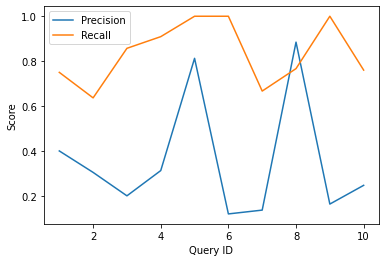

Average precision of bigram index on Ip over 10 queries = 0.35797483850163003
Average recall of bigram index on Ip over 10 queries = 0.8345930735930736


In [43]:
Ip_wildcard_queries_expanded = expand_wildcard(Ip_wildcard_queries, Ip_bigram_index)
Ip_wildcard_results = results(Ip_wildcard_queries_expanded, inv_ind_without_stopwords)
Ip_wildcard_eval = evaluate(Ip_wildcard_results, parsed_relevant_docs, mp)
print(f"Average precision of bigram index on Ip over 10 queries = {sum(Ip_wildcard_eval[0])/10}")
print(f"Average recall of bigram index on Ip over 10 queries = {sum(Ip_wildcard_eval[1])/10}")

There is a drop in precision and an increase in recall. The wildcard expressions cause a larger number of both relevant and irrelevant documents to retrieved.

<h4> Bigram index on Ir </h4> 

In [44]:
Ir_bigram_index = bigram_index(stemmed_docs)

In [45]:
Ir_wildcard_queries = ['the *ect of small di*rt in the surf* of a caviti reson',
                            'the determ* of the or*t of individu *eor by radio method',
                            'the *min of ion mass in the ion*er by the studi of back scat* radio wave',
                            'theo* studi of the sourc of high *uenc radio wave e*t from the planet jupit',
                            'sim*an obs* of whistler and *tn discharg',
                            'var* in the height of re*t of low or veri low *enc radio wave in the period befor ground sunris',
                            'the use of ion*er cross mod* in the determin of ionospher electron *iti and collis frequenc',
                            'meas*r of *spher drift near the equ*',
                            'the use of an*gu comp* in upper *pher theori',
                            'the use of lunar radio refl* in inv*tig of the natur of the moon *fac']

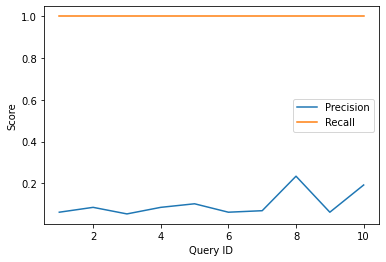

Average precision of bigram index on Ir over 10 queries = 0.10087109673958465
Average recall of bigram index on Ir over 10 queries = 1.0


In [46]:
Ir_wildcard_queries_expanded = expand_wildcard(Ir_wildcard_queries, Ir_bigram_index)
Ir_wildcard_results = results(Ir_wildcard_queries_expanded, inv_ind_stemmed)
Ir_wildcard_eval = evaluate(Ir_wildcard_results, parsed_relevant_docs, mp)
print(f"Average precision of bigram index on Ir over 10 queries = {sum(Ir_wildcard_eval[0])/10}")
print(f"Average recall of bigram index on Ir over 10 queries = {sum(Ir_wildcard_eval[1])/10}")

The performance is very similar to that of the standard Ifull index, except for slight increase in precision and recall. It is also identical to the performance on the standard Ir index. The recall was already very high, and the use of wildcard expressions caused the retrieval of more relevant documents.

Justification: Wildcard queries, in general, are expected to improve recall and decrease precision, as a wildcard expression expands into multiple terms, and documents containing these terms are returned. These documents may or may not be relevant to the original query, since the terms generated from the wildcard expression may or may not be what the user wanted to input. For example, a user may fire a query "en\*nt", expecting "enhancement" to be returned. However, "enchantment" and "enfranchisement" are returned too, which are not relevant to the desired query. Also, bigram indices do not return completely accurate outputs matching the wildcard query. Taking the same example of "en\*nt", the bigrams are "\\$e", "en", "nt, "t\\$", and searching for those also returns "equipment" and "experiment" as results. Due to these reasons, recall generally increases and precision decreases. This can be observed most clearly in the case of Ip, where the use of bigram index increased the average recall from 0.75 to 0.83, while decreasing the average precision from 0.5 to 0.36. Since Ifull and Ir already have close to 100% recall as they return most documents, there is not much difference in the performance when a bigram index is used.